#### Load and explore data

In [1]:
# The code was removed by DSX for sharing.

#### We can see how many records and features we have in our data set.

In [2]:
#df_data.shape

In [3]:
#df_data.describe()

In [4]:
y = df_data['diagnosis'].map(lambda d: 1 if d == 'M' else 0)
X = df_data.drop(['diagnosis', 'id'], axis=1)

###### We split the data set into: train and test data sets.

In [5]:
from sklearn.cross_validation import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=143)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
print("Number of training records: " + str(X_train.size))
print("Number of testing records : " + str(X_test.size))

Number of training records: 11070
Number of testing records : 6000


Create the XGBoost model

In [7]:
import xgboost
from xgboost.sklearn import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score

from xgboost import plot_importance
from matplotlib import pyplot
import pprint
%matplotlib inline

In the cell below, we create our pipeline which contains the XGBoost classifier:

In [8]:
pipeline = Pipeline([('scaler', StandardScaler()), ('classifier', XGBClassifier())])

In [9]:
pipeline

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('classifier', XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1))])

After we have set up our pipeline with the XGBoost classifier, we can train it by invoking the fit method.

In [10]:
pipeline.fit(X_train.values, y_train.values)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('classifier', XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1))])

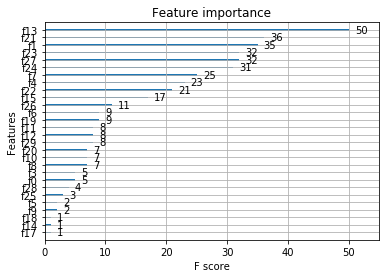

In [11]:
xgboost.plot_importance(pipeline.steps[1][1])

In [12]:
y_pred = pipeline.predict(X_test.values)

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 94.50%


In below cell, we create our XGBoost pipeline and set up the parameter space.

In [14]:
pipeline_gs = Pipeline([('scaler', StandardScaler()), ('classifier', XGBClassifier())])
parameters = {'classifier__learning_rate': [0.01, 0.03], 'classifier__n_estimators': [50, 200]}

We can search for the best parameters over the specified parameters with GridSearchCV. You can use estimator.get_params().keys() to see the available hyperparameters for search.

In [15]:
from sklearn.grid_search import GridSearchCV
clf = GridSearchCV(pipeline_gs, parameters)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [16]:
clf.fit(X_train.values, y_train.values)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('classifier', XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'classifier__learning_rate': [0.01, 0.03], 'classifier__n_estimators': [50, 200]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

We can see the performance result of all parameter combinations including the best parameter combination based on the model performance from the grid search scores.

In [17]:
clf.grid_scores_

[mean: 0.93767, std: 0.01382, params: {'classifier__learning_rate': 0.01, 'classifier__n_estimators': 50},
 mean: 0.93225, std: 0.01382, params: {'classifier__learning_rate': 0.01, 'classifier__n_estimators': 200},
 mean: 0.92954, std: 0.01014, params: {'classifier__learning_rate': 0.03, 'classifier__n_estimators': 50},
 mean: 0.94309, std: 0.01150, params: {'classifier__learning_rate': 0.03, 'classifier__n_estimators': 200}]

In [18]:
y_pred = clf.predict(X_test.values)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.50%


In [19]:
y_pred = clf.predict([X_test.values[55]])
print(y_pred)

[0]


##### Persist model

In this section you will learn how to use Python client libraries to store your XGBoost model in the Watson Machine Learning repository.

In [20]:
!pip install watson_machine_learning_client --upgrade

    100% |████████████████████████████████| 573kB 1.6MB/s eta 0:00:01
Requirement not upgraded as not directly required: tabulate in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson_machine_learning_client)
Requirement not upgraded as not directly required: ibm-cos-sdk in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson_machine_learning_client)
Requirement not upgraded as not directly required: urllib3 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson_machine_learning_client)
Requirement not upgraded as not directly required: requests in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson_machine_learning_client)
Requirement not upgraded as not directly required: certifi in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson_machine_learning_client)
Requirement not upgraded as not directly required: lomond in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson_machine_

In [21]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [22]:
wml_credentials={
  "url": "https://ibm-watson-ml.mybluemix.net",
  "username": "fbfac066-e2ab-46e1-936e-ac16e49654b7",
  "password": "a434ff95-73e2-4928-bae4-73f7c1d0eaca",
  "instance_id": "9b3b2151-5e70-4708-aa94-34ee8950c309"
}

Create API client by running below code.

In [23]:
client = WatsonMachineLearningAPIClient(wml_credentials)

Get instance details.

In [24]:
import json

instance_details = client.service_instance.get_details()
print(json.dumps(instance_details, indent=2))

{
  "entity": {
    "usage": {
      "model_count": {
        "current": 0,
        "limit": 200
      },
      "capacity_units": {
        "current": 0,
        "limit": 180000000
      },
      "prediction_count": {
        "current": 0,
        "limit": 5000
      },
      "computation_time": {
        "current": 0,
        "limit": 180000
      },
      "expiration_date": "2018-05-01T00:00:00.000Z",
      "gpu_count": {
        "current": 0,
        "limit": 8
      },
      "deployment_count": {
        "current": 0,
        "limit": 5
      }
    },
    "organization_guid": "94c012ff-24c2-494c-9de6-3ad823f0cc90",
    "region": "us-south",
    "published_models": {
      "url": "https://ibm-watson-ml.mybluemix.net/v3/wml_instances/9b3b2151-5e70-4708-aa94-34ee8950c309/published_models"
    },
    "plan_id": "3f6acf43-ede8-413a-ac69-f8af3bb0cbfe",
    "deployments": {
      "url": "https://ibm-watson-ml.mybluemix.net/v3/wml_instances/9b3b2151-5e70-4708-aa94-34ee8950c309/deployments"

##### Publish model

In [25]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Rambabu Chinta", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "rambchin@in.ibm.com",
               client.repository.ModelMetaNames.NAME: "BC Model v1"}

In [26]:
published_model = client.repository.store_model(model=clf, meta_props=model_props)

##### Get model details

In [27]:
published_model_uid = client.repository.get_model_uid(published_model)
model_details = client.repository.get_details(published_model_uid)

print(json.dumps(model_details, indent=2))

{
  "entity": {
    "model_type": "scikit-learn-0.19",
    "evaluation_metrics_url": "https://ibm-watson-ml.mybluemix.net/v3/wml_instances/9b3b2151-5e70-4708-aa94-34ee8950c309/published_models/378f323c-e065-49d2-aabd-c79b39a66be3/evaluation_metrics",
    "learning_iterations_url": "https://ibm-watson-ml.mybluemix.net/v3/wml_instances/9b3b2151-5e70-4708-aa94-34ee8950c309/published_models/378f323c-e065-49d2-aabd-c79b39a66be3/learning_iterations",
    "author": {
      "name": "Rambabu Chinta"
    },
    "name": "BC Model v1",
    "learning_configuration_url": "https://ibm-watson-ml.mybluemix.net/v3/wml_instances/9b3b2151-5e70-4708-aa94-34ee8950c309/published_models/378f323c-e065-49d2-aabd-c79b39a66be3/learning_configuration",
    "deployments": {
      "url": "https://ibm-watson-ml.mybluemix.net/v3/wml_instances/9b3b2151-5e70-4708-aa94-34ee8950c309/published_models/378f323c-e065-49d2-aabd-c79b39a66be3/deployments",
      "count": 0
    },
    "latest_version": {
      "created_at": "2018

#### Load model

In this subsection you will learn how to load back saved model from specified instance of Watson Machine Learning.

In [28]:
loaded_model = client.repository.load(published_model_uid)

In [29]:
test_predictions = loaded_model.predict(X_test[:10].values)

In [30]:
print(test_predictions)

[0 1 0 0 0 1 1 0 1 1]


#### Create model deployment

In [31]:
created_deployment = client.deployments.create(published_model_uid, "Deployment of BC v1 model")



#######################################################################################

Synchronous deployment creation for uid: '3d546af9-1502-4cae-9d81-9ae83780748f' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='3d546af9-1502-4cae-9d81-9ae83780748f'
------------------------------------------------------------------------------------------------




In [32]:
scoring_endpoint = client.deployments.get_scoring_url(created_deployment)
print(scoring_endpoint)

https://ibm-watson-ml.mybluemix.net/v3/wml_instances/9b3b2151-5e70-4708-aa94-34ee8950c309/published_models/378f323c-e065-49d2-aabd-c79b39a66be3/deployments/3d546af9-1502-4cae-9d81-9ae83780748f/online


Score:
You can use below method to do test scoring request against deployed model.
Action: Prepare scoring payload with records to score.

In [34]:
import urllib3, requests, json

In [36]:
headers = urllib3.util.make_headers(basic_auth='{username}:{password}'.format(username=wml_credentials['username'], password=wml_credentials['password']))
url = '{}/v3/identity/token'.format(wml_credentials['url'])
response = requests.get(url, headers=headers)
mltoken = json.loads(response.text).get('token')
header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken}

Action: Prepare scoring payload with records to score.

In [73]:
# NOTE: manually define and pass the array(s) of values to be scored in the next line
payload_scoring = {
    "fields": list(X_test.columns),
    "values": X_test[:10].values.tolist()
}

In [74]:
# payload_scoring = {
#    "values": [[0.16, 0.20, 0.010, 0.081, 11.69, 13.19, 14.78, 848.8, 19.48, 627.7, 43.75, 1.23, 3.27, 0.44, 6697.0, 208.3, 324.8, 139.2, 153.6, 2789.0, 0.2, 0.30, 0.013, 0.001, 15.90, 29.47, 35.97, 15.83, 31.03, 0.08]]        
# }

response_scoring = requests.post(scoring_endpoint, json=payload_scoring, headers=header)
print("Scoring response")
print(json.loads(response_scoring.text))

Scoring response
{'values': [[0, [0.9872725605964661, 0.01272746454924345]], [1, [0.003938615322113037, 0.996061384677887]], [0, [0.9899256229400635, 0.010074352845549583]], [0, [0.9595544934272766, 0.04044550284743309]], [0, [0.9961118102073669, 0.003888196311891079]], [1, [0.003610968589782715, 0.9963890314102173]], [1, [0.006175398826599121, 0.9938246011734009]], [0, [0.9903520941734314, 0.009647906757891178]], [1, [0.003875553607940674, 0.9961244463920593]], [1, [0.0045015811920166016, 0.9954984188079834]]], 'fields': ['prediction', 'probability']}
